In this assignment, I optimized a neural network for the IMDB dataset by experimenting with different hidden layer configurations, activation functions, and loss functions. I also applied techniques such as dropout and regularization to enhance validation accuracy. This process gave me deeper insights into how neural network architecture and tuning choices directly affect model performance in deep learning.

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset with a limit of 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Print the number of training and testing samples
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

# View first review (as an integer sequence)
print("First training review (as integers):", train_data[0])

# View first label (0 = negative, 1 = positive)
print("First training label:", train_labels[0])


Training samples: 25000
Testing samples: 25000
First training review (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15,

In [4]:
# Retrieve the word index dictionary mapping words to integer IDs
word_index = imdb.get_word_index()

# Reverse the word index to map integer IDs to words
reverse_word_index = {value: key for key, value in word_index.items()}
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Decode and print the first review
print("Decoded Review:", decode_review(train_data[0]))
import numpy as np

# Count occurrences of each label
unique, counts = np.unique(train_labels, return_counts=True)
print("Label distribution:", dict(zip(unique, counts)))





1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are am

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

np.int64(1)

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]
len(x_train)
len(x_test)

25000

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## **Model 1**
### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (25000, 10000)
y_train shape: (25000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)


**Training your model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6971 - loss: 0.5984 - val_accuracy: 0.8572 - val_loss: 0.4020
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8929 - loss: 0.3385 - val_accuracy: 0.8802 - val_loss: 0.3206
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9212 - loss: 0.2478 - val_accuracy: 0.8889 - val_loss: 0.2835
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9369 - loss: 0.1947 - val_accuracy: 0.8867 - val_loss: 0.2811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9474 - loss: 0.1638 - val_accuracy: 0.8806 - val_loss: 0.2965
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9565 - loss: 0.1373 - val_accuracy: 0.8825 - val_loss: 0.2919
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9659 - loss: 0.1153 - val_accuracy: 0.8852 - val_loss: 0.2952
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9738 - loss: 0.0948 - val_accuracy: 0.8770 - v

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

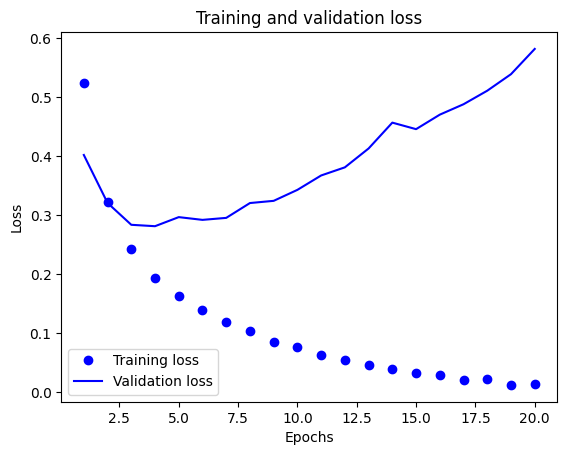

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

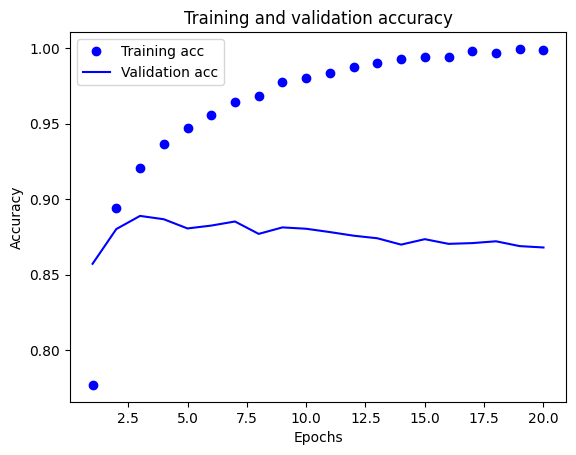

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [102]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7326 - loss: 0.5610
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9022 - loss: 0.2833
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9221 - loss: 0.2169
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9379 - loss: 0.1750
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8816 - loss: 0.2930


In [103]:
results_test

[0.2896621525287628, 0.8846799731254578]

In [100]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9609 - loss: 0.0351
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9647 - loss: 0.0320
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9673 - loss: 0.0305
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9678 - loss: 0.0297
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8692 - loss: 0.1005


In [101]:
results_val

[0.09924159198999405, 0.8711199760437012]

In [24]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.12246396],
       [0.9996447 ],
       [0.678705  ],
       ...,
       [0.12225822],
       [0.03262837],
       [0.85796607]], dtype=float32)

### Using a trained model to generate predictions on new data

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.12246396],
       [0.9996447 ],
       [0.678705  ],
       ...,
       [0.12225822],
       [0.03262837],
       [0.85796607]], dtype=float32)

## Summary

## **Model 2**
#### (with Layer 1, 16 units,  loss as binary_crossentropy)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7066 - loss: 0.6013 - val_accuracy: 0.8517 - val_loss: 0.4221
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8898 - loss: 0.3653 - val_accuracy: 0.8799 - val_loss: 0.3380
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9129 - loss: 0.2842 - val_accuracy: 0.8843 - val_loss: 0.3059
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9282 - loss: 0.2347 - val_accuracy: 0.8873 - val_loss: 0.2900
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9362 - loss: 0.2047 - val_accuracy: 0.8784 - val_loss: 0.2984
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9483 - loss: 0.1817 - val_accuracy: 0.8867 - val_loss: 0.2774
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9518 - loss: 0.1603 - val_accuracy: 0.8871 - val_loss: 0.2851
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9578 - loss: 0.1462 - val_accuracy: 0.8812 - v

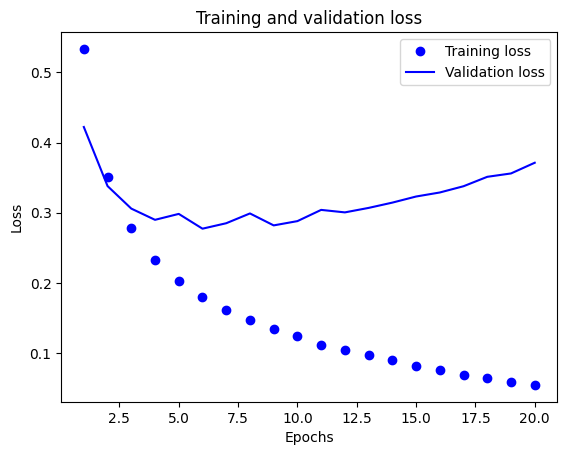

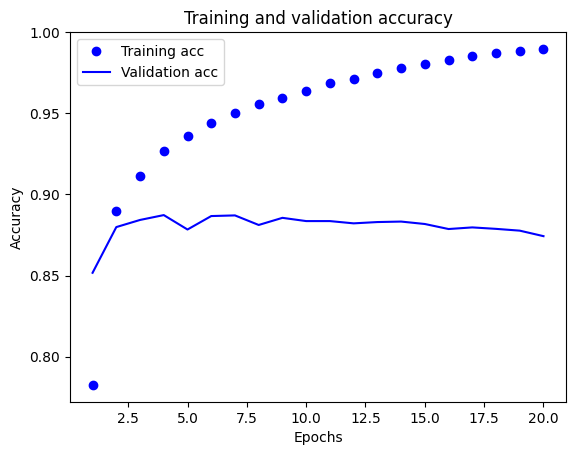

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7552 - loss: 0.5579
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8987 - loss: 0.3198
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9174 - loss: 0.2472
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9248 - loss: 0.2173
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8872 - loss: 0.2788


In [26]:
# Build model with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


#Compile the model with binary cross-entropy loss
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


#Set aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [27]:
results_test

[0.27754366397857666, 0.8893200159072876]

In [28]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9370 - loss: 0.1880
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9400 - loss: 0.1755
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9478 - loss: 0.1584
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9499 - loss: 0.1500
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8791 - loss: 0.3002


In [29]:
results_val

[0.2966528832912445, 0.8827999830245972]

In [30]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.18791036],
       [0.99998176],
       [0.7564202 ],
       ...,
       [0.10113773],
       [0.07248574],
       [0.6745628 ]], dtype=float32)

## **Model 3**
#### (with 3 hidden layer and 16 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6672 - loss: 0.6179 - val_accuracy: 0.8642 - val_loss: 0.4363
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8901 - loss: 0.3743 - val_accuracy: 0.8866 - val_loss: 0.3282
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9250 - loss: 0.2551 - val_accuracy: 0.8795 - val_loss: 0.3006
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9374 - loss: 0.1977 - val_accuracy: 0.8872 - val_loss: 0.2819
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9531 - loss: 0.1547 - val_accuracy: 0.8744 - val_loss: 0.3169
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9587 - loss: 0.1348 - val_accuracy: 0.8789 - val_loss: 0.3214
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9702 - loss: 0.1056 - val_accuracy: 0.8640 - val_loss: 0.3930
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9737 - loss: 0.0959 - val_accuracy: 0.8713 - v

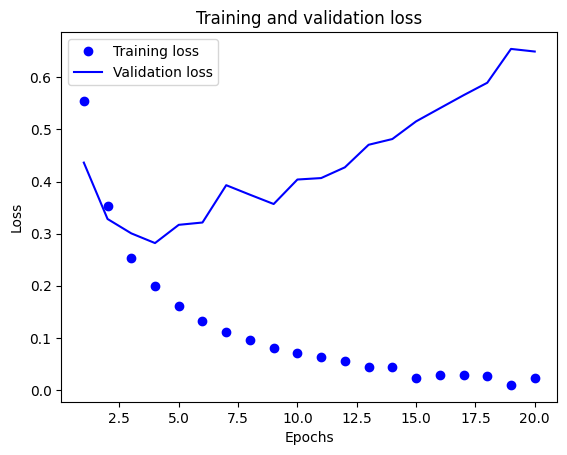

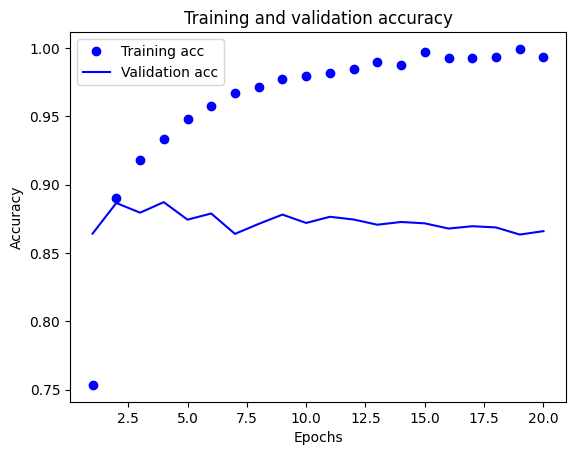

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7180 - loss: 0.5711
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9048 - loss: 0.2794
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9322 - loss: 0.2016
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9364 - loss: 0.1742
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8752 - loss: 0.3142


In [31]:
# build the model with three hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)




In [32]:
results_test

[0.314523845911026, 0.8762800097465515]

In [33]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9482 - loss: 0.1458
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9605 - loss: 0.1229
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9595 - loss: 0.1170
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9697 - loss: 0.0944
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8523 - loss: 0.4415


In [34]:
results_val

[0.44128307700157166, 0.8532000184059143]

In [35]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.05094457],
       [0.9999876 ],
       [0.02264706],
       ...,
       [0.05301325],
       [0.02094474],
       [0.3899374 ]], dtype=float32)

## **Model 4**
#### (with 32 units with 2 hidden layers)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6929 - loss: 0.5845 - val_accuracy: 0.8645 - val_loss: 0.3714
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8901 - loss: 0.3178 - val_accuracy: 0.8660 - val_loss: 0.3322
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9184 - loss: 0.2322 - val_accuracy: 0.8901 - val_loss: 0.2769
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9397 - loss: 0.1755 - val_accuracy: 0.8531 - val_loss: 0.3654
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9504 - loss: 0.1495 - val_accuracy: 0.8785 - val_loss: 0.3183
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9619 - loss: 0.1208 - val_accuracy: 0.8850 - val_loss: 0.3030
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9682 - loss: 0.1001 - val_accuracy: 0.8721 - val_loss: 0.3376
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9753 - loss: 0.0831 - val_accuracy: 0.8813 - v

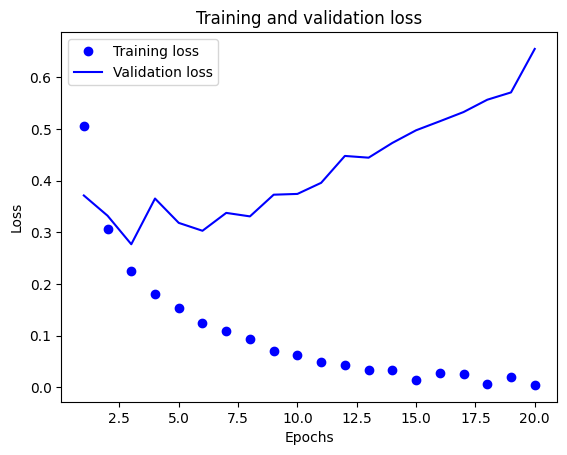

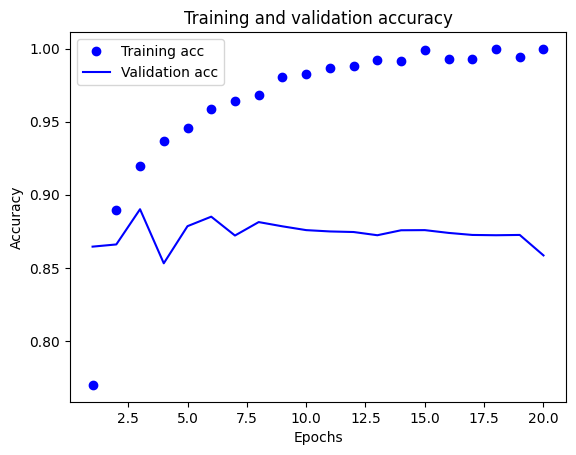

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7303 - loss: 0.5438
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9051 - loss: 0.2631
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9240 - loss: 0.2048
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9347 - loss: 0.1733
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8794 - loss: 0.2974


In [36]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [37]:
results_test

[0.2948075830936432, 0.8837199807167053]

In [38]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9473 - loss: 0.1476
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9550 - loss: 0.1279
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9670 - loss: 0.1001
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9704 - loss: 0.0888
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8698 - loss: 0.3801


In [39]:
results_val

[0.37810006737709045, 0.8715199828147888]

In [40]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.06280497],
       [0.99998456],
       [0.2787361 ],
       ...,
       [0.06324598],
       [0.02708722],
       [0.7931943 ]], dtype=float32)

## **Model 5**
#### (with 2 hidden layers, 64 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.6526 - loss: 0.5948 - val_accuracy: 0.8477 - val_loss: 0.3773
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8835 - loss: 0.3121 - val_accuracy: 0.8872 - val_loss: 0.2858
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9151 - loss: 0.2313 - val_accuracy: 0.8860 - val_loss: 0.2850
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9343 - loss: 0.1797 - val_accuracy: 0.8858 - val_loss: 0.2851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9487 - loss: 0.1485 - val_accuracy: 0.8842 - val_loss: 0.2868
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9648 - loss: 0.1123 - val_accuracy: 0.8352 - val_loss: 0.5091
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9586 - loss: 0.1173 - val_accuracy: 0.8753 - val_loss: 0.3449
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9676 - loss: 0.0934 - val_accuracy: 0.8828 - v

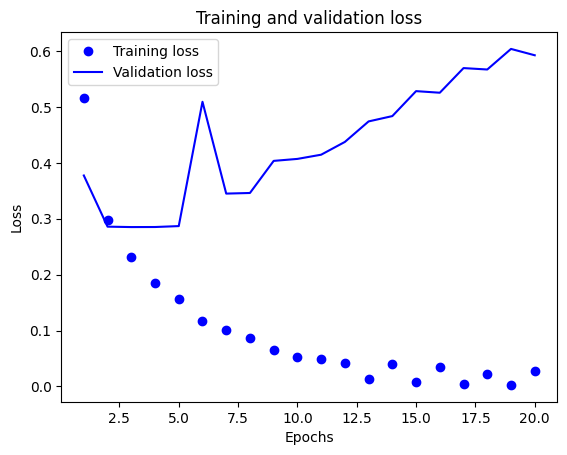

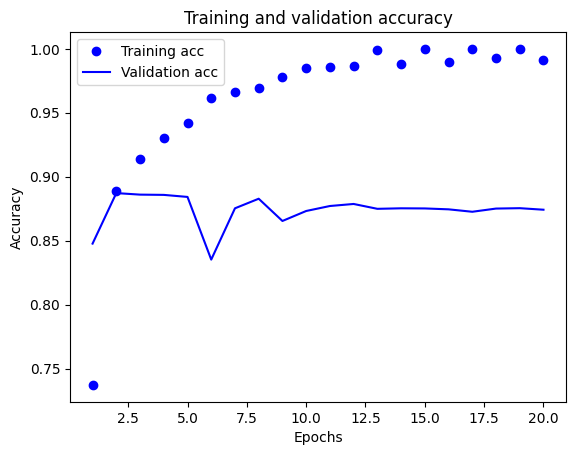

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7235 - loss: 0.5443
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9049 - loss: 0.2591
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9204 - loss: 0.2093
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9344 - loss: 0.1722
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8832 - loss: 0.2950


In [41]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [42]:
results_test

[0.2930074632167816, 0.8840000033378601]

In [43]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9457 - loss: 0.1472
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9539 - loss: 0.1237
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9550 - loss: 0.1190
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9675 - loss: 0.0916
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8485 - loss: 0.4620


In [44]:
results_val

[0.4514266550540924, 0.8502799868583679]

In [45]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.12793837],
       [0.99995613],
       [0.99176466],
       ...,
       [0.1950063 ],
       [0.05801094],
       [0.98471874]], dtype=float32)

## **Model 6**
#### (with 2 hidden layers, 16 units and tanh activation)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6941 - loss: 0.1960 - val_accuracy: 0.8694 - val_loss: 0.1130
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8914 - loss: 0.0970 - val_accuracy: 0.8850 - val_loss: 0.0904
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9288 - loss: 0.0639 - val_accuracy: 0.8745 - val_loss: 0.0920
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9355 - loss: 0.0530 - val_accuracy: 0.8755 - val_loss: 0.0924
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9459 - loss: 0.0457 - val_accuracy: 0.8794 - val_loss: 0.0882
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9602 - loss: 0.0344 - val_accuracy: 0.8661 - val_loss: 0.1017
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9678 - loss: 0.0291 - val_accuracy: 0.8829 - val_loss: 0.0888
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9698 - loss: 0.0271 - val_accuracy: 0.8790 - v

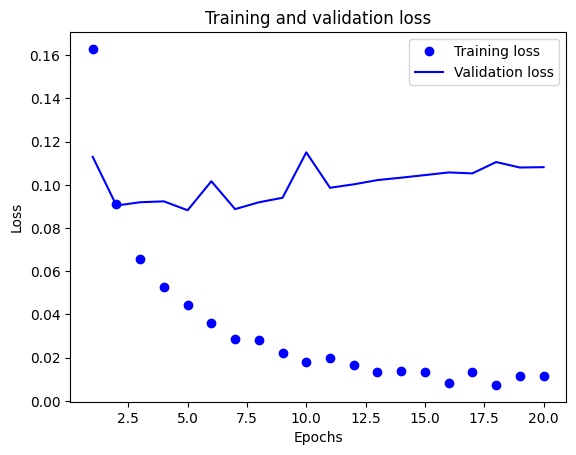

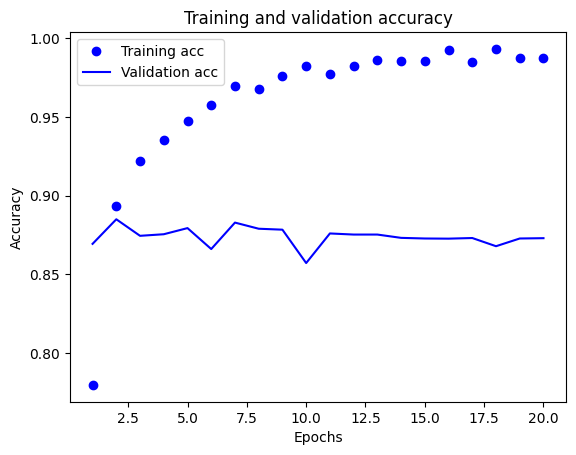

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7490 - loss: 0.1845
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9014 - loss: 0.0851
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9230 - loss: 0.0626
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9380 - loss: 0.0504
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8746 - loss: 0.0929


In [46]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [47]:
results_test

[0.09168221056461334, 0.8760799765586853]

In [48]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9405 - loss: 0.0478
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9523 - loss: 0.0401
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9605 - loss: 0.0340
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9601 - loss: 0.0344
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8647 - loss: 0.1064


In [49]:
results_val

[0.10582546889781952, 0.8665599822998047]

In [50]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.01220038],
       [0.999303  ],
       [0.35808104],
       ...,
       [0.05189779],
       [0.00903848],
       [0.23020072]], dtype=float32)

## **Model 7**
#### (with 2 hidden layers with 16 units per layer with relu activation and "mse" as loss function)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6701 - loss: 0.2086 - val_accuracy: 0.8276 - val_loss: 0.1356
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8899 - loss: 0.1048 - val_accuracy: 0.8809 - val_loss: 0.0964
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9181 - loss: 0.0761 - val_accuracy: 0.8867 - val_loss: 0.0875
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9378 - loss: 0.0600 - val_accuracy: 0.8868 - val_loss: 0.0839
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9440 - loss: 0.0534 - val_accuracy: 0.8832 - val_loss: 0.0858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9539 - loss: 0.0448 - val_accuracy: 0.8816 - val_loss: 0.0852
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9611 - loss: 0.0390 - val_accuracy: 0.8778 - val_loss: 0.0908
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9659 - loss: 0.0347 - val_accuracy: 0.8803 - v

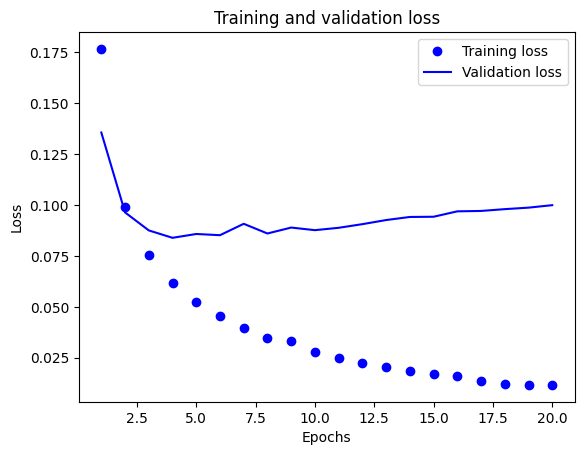

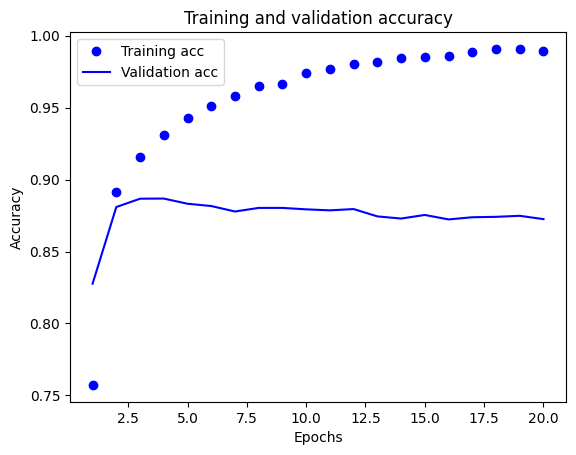

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7311 - loss: 0.1883
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8967 - loss: 0.0902
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9210 - loss: 0.0674
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9367 - loss: 0.0547
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8825 - loss: 0.0869


In [51]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)




In [52]:
results_test

[0.08623550832271576, 0.8837199807167053]

In [53]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9454 - loss: 0.0481
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9498 - loss: 0.0440
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9605 - loss: 0.0371
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9613 - loss: 0.0347
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8700 - loss: 0.0968


In [54]:
results_val

[0.094853475689888, 0.8738399744033813]

In [55]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.14533821],
       [0.99997765],
       [0.90307385],
       ...,
       [0.26665938],
       [0.08300009],
       [0.71102095]], dtype=float32)

## **Model 8**
#### with 1 hidden layer , 16 units, relu activation, mse as loss function and L2 regularization


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7142 - loss: 0.3924 - val_accuracy: 0.8328 - val_loss: 0.1886
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8625 - loss: 0.1709 - val_accuracy: 0.8619 - val_loss: 0.1587
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8812 - loss: 0.1485 - val_accuracy: 0.8237 - val_loss: 0.1667
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8657 - loss: 0.1509 - val_accuracy: 0.8694 - val_loss: 0.1485
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8753 - loss: 0.1442 - val_accuracy: 0.7998 - val_loss: 0.1744
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8719 - loss: 0.1463 - val_accuracy: 0.8665 - val_loss: 0.1462
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8858 - loss: 0.1385 - val_accuracy: 0.8643 - val_loss: 0.1457
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8741 - loss: 0.1390 - val_accuracy: 0.8678 - v

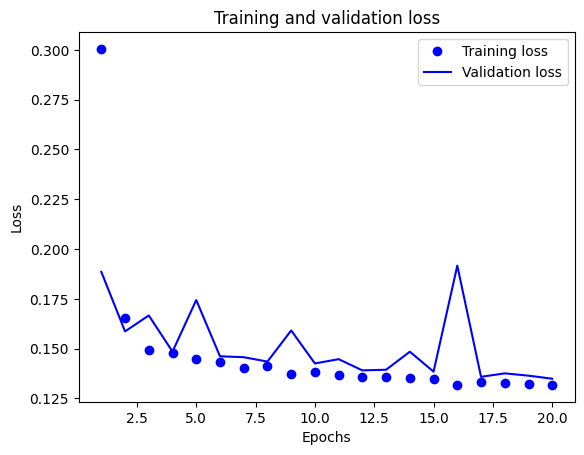

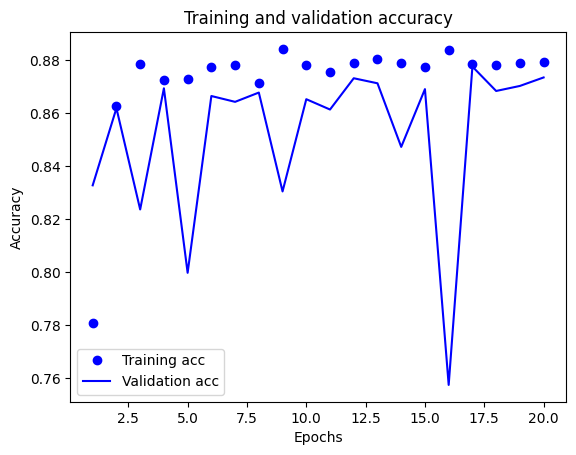

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7238 - loss: 0.3493
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8684 - loss: 0.1580
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8721 - loss: 0.1490
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8691 - loss: 0.1460
655/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8673 - loss: 0.1475

In [ ]:
# build the model with 1 hidden layer
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)



In [71]:
results_test

[0.08257480710744858, 0.888759970664978]

In [72]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9489 - loss: 0.0438
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9544 - loss: 0.0393
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9613 - loss: 0.0349
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9602 - loss: 0.0364
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8726 - loss: 0.0975


In [73]:
results_val

[0.09699200093746185, 0.8731200098991394]

In [74]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02536614],
       [0.9999883 ],
       [0.6944462 ],
       ...,
       [0.11331335],
       [0.0179013 ],
       [0.42837662]], dtype=float32)

## **Model 9**
#### (with 1 hidden layer with 16 units with Dropuout(0.5))



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6527 - loss: 0.2189 - val_accuracy: 0.8519 - val_loss: 0.1411
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8347 - loss: 0.1383 - val_accuracy: 0.8771 - val_loss: 0.1118
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8747 - loss: 0.1106 - val_accuracy: 0.8631 - val_loss: 0.1078
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8942 - loss: 0.0945 - val_accuracy: 0.8816 - val_loss: 0.0947
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9075 - loss: 0.0832 - val_accuracy: 0.8866 - val_loss: 0.0885
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9143 - loss: 0.0769 - val_accuracy: 0.8866 - val_loss: 0.0866
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9252 - loss: 0.0676 - val_accuracy: 0.8881 - val_loss: 0.0844
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9291 - loss: 0.0657 - val_accuracy: 0.8861 - v

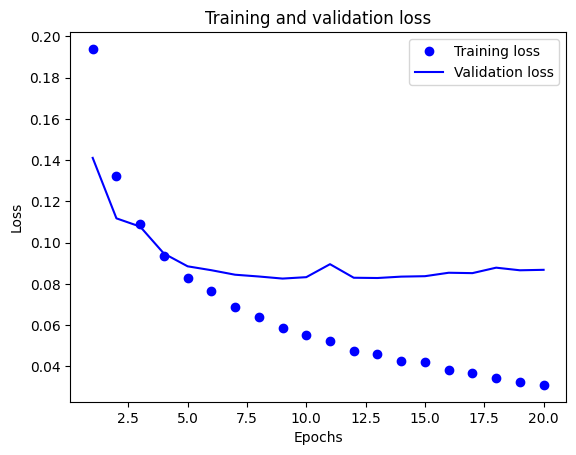

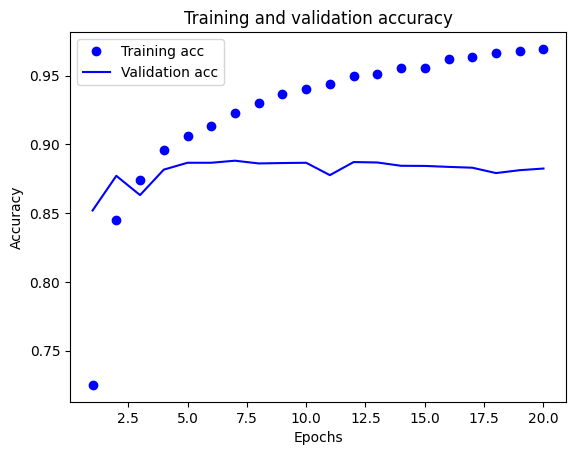

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6965 - loss: 0.2004
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8545 - loss: 0.1209
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8879 - loss: 0.0943
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9040 - loss: 0.0833
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8856 - loss: 0.0880


In [75]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [76]:
results_test

[0.0879753902554512, 0.8845199942588806]

In [77]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9095 - loss: 0.0755
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9242 - loss: 0.0661
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9268 - loss: 0.0620
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9329 - loss: 0.0595
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8873 - loss: 0.0830


In [78]:
results_val

[0.08220625668764114, 0.8879600167274475]

In [79]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.12468164],
       [0.99847263],
       [0.7748461 ],
       ...,
       [0.14003071],
       [0.09269241],
       [0.54601836]], dtype=float32)

## **Model 10**
#### (1 hidden layer with 32 units with Tanh activation and Dropuout(0.5), MSE)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6867 - loss: 0.2043 - val_accuracy: 0.8610 - val_loss: 0.1244
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8858 - loss: 0.1110 - val_accuracy: 0.8455 - val_loss: 0.1157
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9071 - loss: 0.0862 - val_accuracy: 0.8868 - val_loss: 0.0909
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9206 - loss: 0.0721 - val_accuracy: 0.8790 - val_loss: 0.0914
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9276 - loss: 0.0642 - val_accuracy: 0.8748 - val_loss: 0.0923
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9347 - loss: 0.0591 - val_accuracy: 0.8865 - val_loss: 0.0833
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9463 - loss: 0.0507 - val_accuracy: 0.8868 - val_loss: 0.0832
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9538 - loss: 0.0446 - val_accuracy: 0.8782 - v

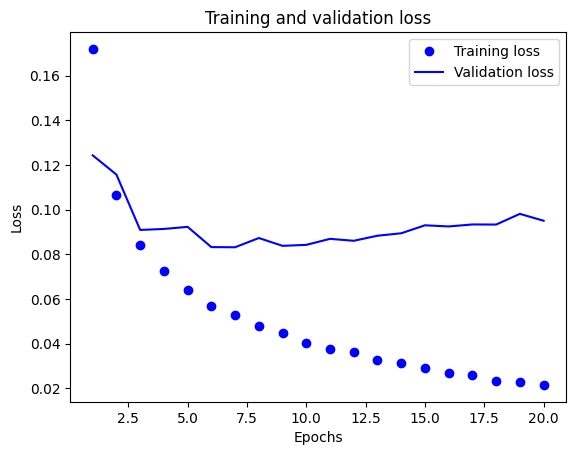

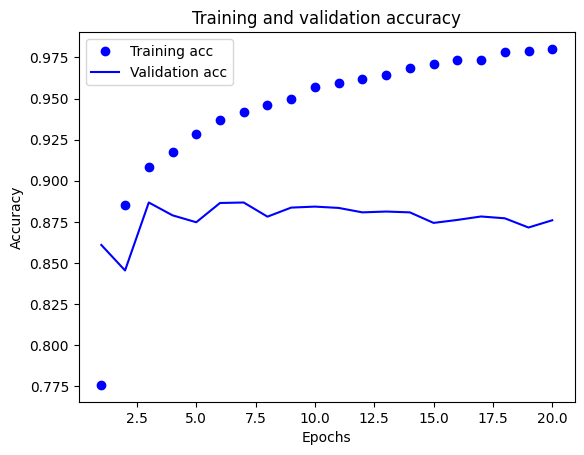

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7226 - loss: 0.1820
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8888 - loss: 0.0938
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9096 - loss: 0.0753
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9236 - loss: 0.0644
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8842 - loss: 0.0849


In [80]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)



In [81]:
results_test

[0.08448057621717453, 0.8847600221633911]

In [82]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9285 - loss: 0.0582
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9378 - loss: 0.0532
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9464 - loss: 0.0470
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9454 - loss: 0.0466
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8800 - loss: 0.0872


In [83]:
results_val

[0.08635950833559036, 0.8835200071334839]

In [84]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.06059152],
       [0.9999352 ],
       [0.8871816 ],
       ...,
       [0.11352454],
       [0.03659799],
       [0.4910792 ]], dtype=float32)